In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load uhat dataset
with np.load('uhat_dataset.npz') as data:
    train_data = data['x_chars_train']
    test_data = data['x_chars_test']
    train_labels = data['y_chars_train']
    test_labels = data['y_chars_test']

In [3]:
# normalize image data and add make sure image shape is (28, 28, 1)
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [4]:
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
test_data, test_labels = shuffle(test_data, test_labels, random_state=0)

In [5]:
num_classes = 40
input_shape = (28, 28, 1)

In [6]:
train_data.shape

(28328, 28, 28, 1)

27


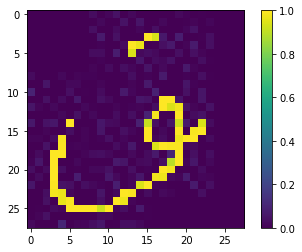

In [7]:
print(train_labels[0])

plt.imshow(train_data[0, :, :, 0])
plt.colorbar()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(40, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [11]:
batch_size = 128
epochs = 25

model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
200/200 [==============================] - 9s 47ms/step - loss: 1.8140 - accuracy: 0.4703 - val_loss: 0.8792 - val_accuracy: 0.7381
Epoch 2/25
200/200 [==============================] - 9s 44ms/step - loss: 0.8100 - accuracy: 0.7448 - val_loss: 0.5513 - val_accuracy: 0.8330
Epoch 3/25
200/200 [==============================] - 10s 48ms/step - loss: 0.5619 - accuracy: 0.8216 - val_loss: 0.4080 - val_accuracy: 0.8761
Epoch 4/25
200/200 [==============================] - 9s 47ms/step - loss: 0.4416 - accuracy: 0.8591 - val_loss: 0.3529 - val_accuracy: 0.8916
Epoch 5/25
200/200 [==============================] - 10s 48ms/step - loss: 0.3674 - accuracy: 0.8823 - val_loss: 0.3109 - val_accuracy: 0.9001
Epoch 6/25
200/200 [==============================] - 9s 46ms/step - loss: 0.3091 - accuracy: 0.8999 - val_loss: 0.2971 - val_accuracy: 0.9068
Epoch 7/25
200/200 [==============================] - 9s 47ms/step - loss: 0.2627 - accuracy: 0.9155 - val_loss: 0.2643 - val_accuracy: 0.91

In [12]:
model.evaluate(test_data, test_labels, verbose=2)

153/153 - 0s - loss: 0.1444 - accuracy: 0.9568


[0.14443522691726685, 0.9567623138427734]

In [13]:
model.save('uhat.m5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: uhat.m5/assets
